In [4]:
"""
Importação das bibliotecas utilizadas na questão:
1. Numpy = Fornece um grande conjunto de funções e operações de biblioteca 
que auxiliam na realização de cálculos numéricos e manipulação de matrizes.

2. Pandas = Realiza a normalização dos dados.

3. Matplotlib = Trata-se de uma biblioteca que é utilizada para plotar gráficos
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
"""
Importação das bibliotecas utilizadas na questão:
1. davies_bouldin_score = É biblioteca de que calcula a média entre os scores.

2. KMeans = Responsável por calcular as médias.
"""
from sklearn.metrics import davies_bouldin_score,mean_squared_error
from sklearn.cluster import KMeans

In [6]:
"""
Função responsável por fazer a leitura dos datasets.
Parâmetros da função: 
primeiro parâmetro = nome do arquivo, 
delimeter = trata-se do que tá separando cada valor do dataset. 
usecols = Limita quais colunas irão aparecer no array.
"""
X = np.genfromtxt('iris.data', delimiter= ',',usecols=(0,1))

In [7]:
y = []
for i in range(150):
  if(i < 50):
    y.append(0)
  elif(i < 100):
      y.append(1)
  elif(i < 150):
      y.append(2)


### Gerando um dataset toy

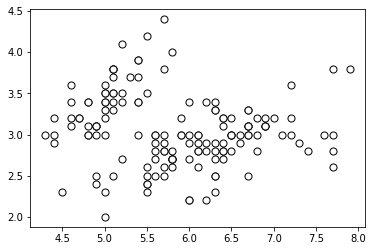

In [8]:
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### Convertendo em DataFrame

In [9]:
cluster_df = pd.DataFrame(X,columns=['X','y'])

In [10]:
cluster_df

,X,y
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Plotando Davies-Bouldin score

In [11]:
def get_kmeans_score(data, center):
    
    kmeans = KMeans(n_clusters=center, init='k-means++')
    model = kmeans.fit_predict(cluster_df)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(cluster_df, model)
    
    return score

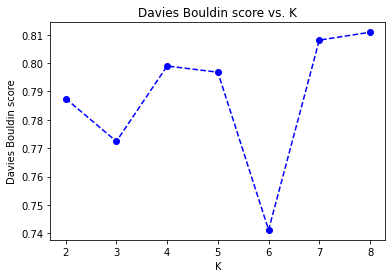

In [12]:
scores = []
centers = list(range(2,9))
for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

### Plotando Dendograma

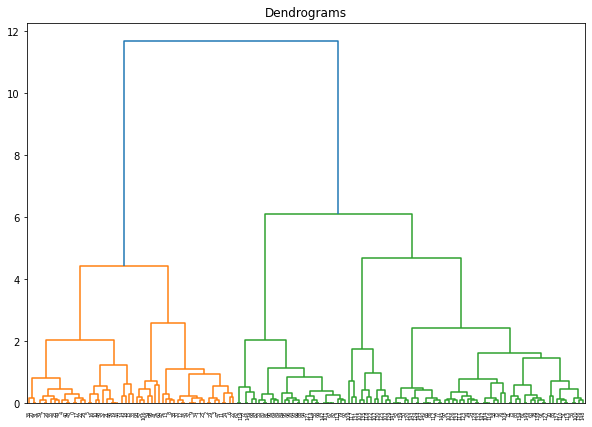

In [13]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

## Analisando os centróides de acordo com Davies-Bouldin (DB score) 

In [29]:
def kmeans_(X, n_cluster):
    km = KMeans(
        n_clusters=n_cluster, init='k-means++'
    )

    y_km = km.fit_predict(X)
    
    for i in range(n_cluster):
        plt.scatter(
            X[y_km == i, 0], X[y_km == i, 1],
            #s=50, c='lightgreen',
            #marker='s', edgecolor='black',
            label='cluster '+str(i)
        )
    
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [33]:
 km = KMeans(
        n_clusters= 3, init='k-means++'
    )
y_pred = km.fit_predict(X)

In [34]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [35]:
Y_test = pd.DataFrame(data=y,columns=['0'])

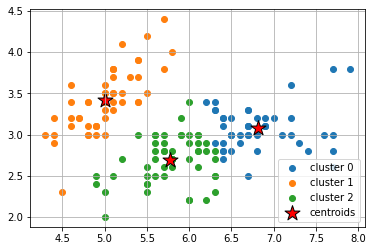

In [36]:
for i in range(3,4):
    kmeans_(X, i)

In [37]:
print('Mean squared error: %.2f' %mean_squared_error(y_pred, Y_test))

Mean squared error: 1.07
